# 聚类

In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [4]:
raw_data = np.loadtxt('./datacode_for_book/chapter4/cluster.txt')
x = raw_data[:,:-1]
y_true = raw_data[:,-1]
x[:5]
y_true[:5]

array([[ 0.58057881,  0.43199283],
       [ 1.70562094,  1.16006288],
       [ 0.8016818 , -0.51336891],
       [-0.15328359, -1.64435136],
       [ 0.70765057, -1.65668129]])

array([0., 0., 2., 1., 2.])

In [5]:
n_clusters = 3
model_kmeans = KMeans(n_clusters=n_clusters,random_state=0)
model_kmeans.fit(x)
y_predict = model_kmeans.predict(x)
y_predict[:5]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

array([1, 1, 2, 0, 2])

In [16]:
#模型效果评估
n_samples,n_features = x.shape
inertias = model_kmeans.inertia_  # 样本距离最近的聚类中心的总和
inertias
adjusted_rand_s = metrics.adjusted_rand_score(y_true, y_predict)  # 调整后的兰德指数
adjusted_rand_s
mutual_info_s = metrics.mutual_info_score(y_true, y_predict)  # 互信息
mutual_info_s
adjusted_mutual_info_s = metrics.adjusted_mutual_info_score(y_true, y_predict)  # 调整后的互信息
adjusted_mutual_info_s
homogeneity_s = metrics.homogeneity_score(y_true, y_predict)  # 同质化得分
homogeneity_s
completeness_s = metrics.completeness_score(y_true, y_predict)  # 完整性得分
completeness_s
v_measure_s = metrics.v_measure_score(y_true, y_predict)  # V-measure得分
v_measure_s
silhouette_s = metrics.silhouette_score(x, y_predict, metric='euclidean')  # 平均轮廓系数
silhouette_s
calinski_harabaz_s = metrics.calinski_harabaz_score(x, y_predict)  # Calinski和Harabaz得分
calinski_harabaz_s

300.1262936093466

0.9642890803276076

1.0310595406681184

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.938399249349474

0.9385116928897981

0.9385372785555511

0.938524485548298

0.6342086134083013

2860.8215946947635

In [17]:
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线
print ('ine\tARI\tMI\tAMI\thomo\tcomp\tv_m\tsilh\tc&h')  # 打印输出指标标题
print ('%d\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%d' % (
inertias, adjusted_rand_s, mutual_info_s, adjusted_mutual_info_s, homogeneity_s, completeness_s, v_measure_s,
silhouette_s, calinski_harabaz_s))  # 打印输出指标值
print (70 * '-')  # 打印分隔线
print ('short name \t full name')  # 打印输出缩写和全名标题
print ('ine \t inertias')
print ('ARI \t adjusted_rand_s')
print ('MI \t mutual_info_s')
print ('AMI \t adjusted_mutual_info_s')
print ('homo \t homogeneity_s')
print ('comp \t completeness_s')
print ('v_m \t v_measure_s')
print ('silh \t silhouette_s')
print ('c&h \t calinski_harabaz_s')

samples: 1000 	 features: 2
----------------------------------------------------------------------
ine	ARI	MI	AMI	homo	comp	v_m	silh	c&h
300	0.96	1.03	0.94	0.94	0.94	0.94	0.63	2860
----------------------------------------------------------------------
short name 	 full name
ine 	 inertias
ARI 	 adjusted_rand_s
MI 	 mutual_info_s
AMI 	 adjusted_mutual_info_s
homo 	 homogeneity_s
comp 	 completeness_s
v_m 	 v_measure_s
silh 	 silhouette_s
c&h 	 calinski_harabaz_s


<Figure size 1152x576 with 0 Axes>

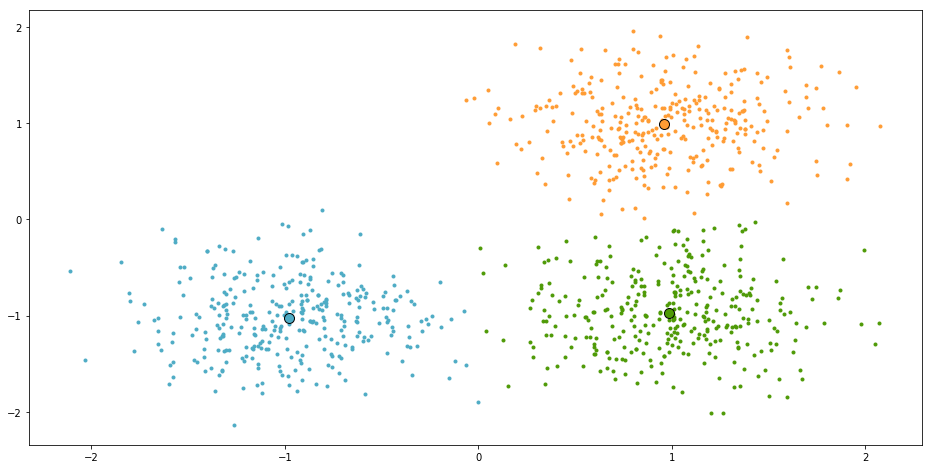

In [21]:
# 模型效果可视化
centers = model_kmeans.cluster_centers_  # 各类别中心
colors = ['#4EACC5', '#FF9C34', '#4E9A06']  # 设置不同类别的颜色
plt.figure(figsize=(16,8))  # 建立画布
for i in range(n_clusters):  # 循环读类别
    index_sets = np.where(y_predict == i)  # 找到相同类的索引集合
    cluster = x[index_sets]  # 将相同类的数据划分为一个聚类子集
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], marker='.')  # 展示聚类子集内的样本点
    plt.plot(centers[i][0], centers[i][1], 'o', markerfacecolor=colors[i], markeredgecolor='k',
             markersize=10)  # 展示各聚类子集的中心
plt.show()  # 展示图像

In [22]:
# 模型应用
new_X = [1, 3.6]
cluster_label = model_kmeans.predict(np.array(new_X).reshape(1,-1))
print ('cluster of new data point is: %d' % cluster_label)

cluster of new data point is: 1


In [25]:
#保存模型
import pickle
pickle.dump(model_kmeans,open('./kmeans_model.model','wb'))
pickle.load(open('./kmeans_model.model','rb'))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

# 线性回归

In [2]:
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet  # 批量导入要实现的回归算法
from sklearn.svm import SVR  # SVM中的回归算法
# from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法

![回归指标](https://github.com/longfengpili/Data-Analysis-and-Data-Operation-with-python/blob/master/%E5%9B%9E%E5%BD%92%E8%AF%84%E4%BB%B7%E6%8C%87%E6%A0%87.png?raw=true)

In [3]:
# 数据准备
raw_data = np.loadtxt('./datacode_for_book/chapter4/regression.txt')  # 读取数据文件
X = raw_data[:, :-1]  # 分割自变量
y = raw_data[:, -1]  # 分割因变量
X[:3]
y[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

array([24. , 21.6, 34.7])

<Figure size 1152x360 with 0 Axes>

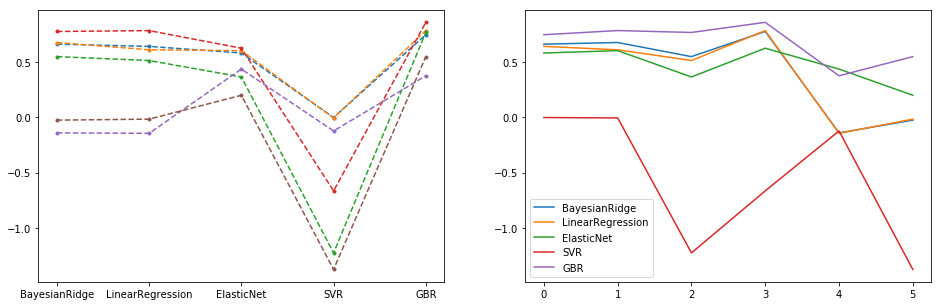

In [4]:
# 训练回归模型
n_folds = 6  # 设置交叉检验的次数
model_br = BayesianRidge()  # 建立贝叶斯岭回归模型对象
model_lr = LinearRegression()  # 建立普通线性回归模型对象
model_etc = ElasticNet()  # 建立弹性网络回归模型对象
model_svr = SVR(gamma='auto')  # 建立支持向量机回归模型对象
model_gbr = GradientBoostingRegressor()  # 建立梯度增强回归模型对象
model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']  # 不同模型的名称列表
model_dic = [model_br, model_lr, model_etc, model_svr, model_gbr]  # 不同回归模型对象的集合
cv_score_list = []  # 交叉检验结果列表
pre_y_list = []  # 各个回归模型预测的y值列表
for model in model_dic:  # 读出每个回归模型对象
    scores = cross_val_score(model, X, y, cv=n_folds)  # 将每个回归模型导入交叉检验模型中做训练检验
    cv_score_list.append(scores)  # 将交叉检验结果存入结果列表
    pre_y_list.append(model.fit(X, y).predict(X))  # 将回归训练中得到的预测y存入列表
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(model_names,cv_score_list,'.--')
plt.subplot(1,2,2)
for index,name in enumerate(model_names):
    plt.plot(list(range(n_folds)),cv_score_list[index],label=name)
plt.legend()

In [6]:
# 模型效果指标评估
n_samples, n_features = X.shape  # 总样本量,总特征数
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]  # 回归评估指标对象集
model_metrics_list = []  # 回归评估指标列表
for i in range(5):  # 循环每个模型索引
    tmp_list = []  # 每个内循环的临时结果列表
    for m in model_metrics_name:  # 循环每个指标对象
        tmp_score = m(y, pre_y_list[i])  # 计算每个回归指标结果
        tmp_list.append(tmp_score)  # 将结果存入每个内循环的临时结果列表
    model_metrics_list.append(tmp_list)  # 将结果存入回归评估指标列表
df1 = pd.DataFrame(cv_score_list, index=model_names)  # 建立交叉检验的数据框
df2 = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])  # 建立回归指标的数据框
df1
df2

,0,1,2,3,4,5
BayesianRidge,0.662422,0.677079,0.549702,0.776896,-0.139738,-0.024448
LinearRegression,0.642240,0.611521,0.514471,0.785033,-0.143673,-0.015390
ElasticNet,0.582476,0.603773,0.365912,0.625645,0.437122,0.200454
SVR,-0.000799,-0.004447,-1.224386,-0.663773,-0.122252,-1.374062
GBR,0.747724,0.785265,0.768194,0.859493,0.376628,0.549563


,ev,mae,mse,r2
BayesianRidge,0.731143,3.319204,22.696772,0.731143
LinearRegression,0.740608,3.272945,21.897779,0.740608
ElasticNet,0.686094,3.592915,26.499828,0.686094
SVR,0.173548,5.447960,71.637552,0.151410
GBR,0.975126,1.151773,2.099835,0.975126


<Figure size 1152x576 with 0 Axes>

Text(0.5,1,'regression result comparison')

Text(0,0.5,'real and predicted value')

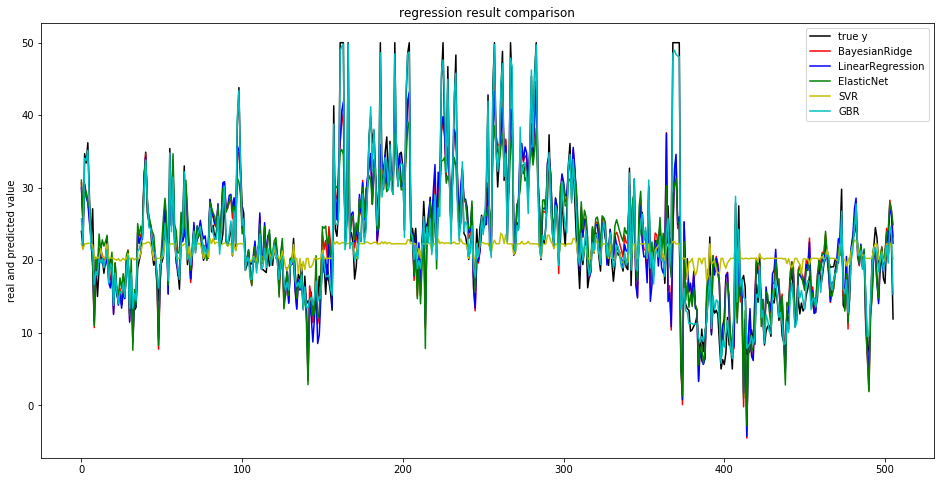

In [8]:
# 模型效果可视化
plt.figure(figsize=(16,8))  # 创建画布
plt.plot(np.arange(X.shape[0]), y, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c']  # 颜色列表
linestyle_list = ['-', '.', 'o', 'v', '*']  # 样式列表
for i, pre_y in enumerate(pre_y_list):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(X.shape[0]), pre_y_list[i], color_list[i], label=model_names[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题

In [9]:
# 模型应用
print ('regression prediction')
new_point_set = [[1.05393, 0., 8.14, 0., 0.538, 5.935, 29.3, 4.4986, 4., 307., 21., 386.85, 6.58],
                 [0.7842, 0., 8.14, 0., 0.538, 5.99, 81.7, 4.2579, 4., 307., 21., 386.75, 14.67],
                 [0.80271, 0., 8.14, 0., 0.538, 5.456, 36.6, 3.7965, 4., 307., 21., 288.99, 11.69],
                 [0.7258, 0., 8.14, 0., 0.538, 5.727, 69.5, 3.7965, 4., 307., 21., 390.95, 11.28]]  # 要预测的新数据集
for i, new_point in enumerate(new_point_set):  # 循环读出每个要预测的数据点
    new_pre_y = model_gbr.predict(np.array(new_point).reshape(1,-1))  # 使用GBR进行预测
    print ('predict for new point %d is:  %.2f' % (i + 1, new_pre_y))  # 打印输出每个数据点的预测信息

regression prediction
predict for new point 1 is:  21.49
predict for new point 2 is:  16.84
predict for new point 3 is:  19.50
predict for new point 4 is:  19.16


# 分类分析

In [1]:
# 导入库
import numpy as np  # 导入numpy库
from sklearn.model_selection import train_test_split  # 数据分区库
from sklearn import tree  # 导入决策树库
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, \
    roc_curve  # 导入指标库
import prettytable  # 导入表格库
import pydotplus  # 导入dot插件库
import matplotlib.pyplot as plt  # 导入图形展示库
import graphviz

+ 【accuracy_score】A = (TP + TN)/(P+N) = (TP + TN)/(TP + FN + FP + TN); 反映了分类器统对整个样本的判定能力——能将正的判定为正，负的判定为负 
+ 【auc】计算AUC值，其中x,y分别为数组形式，根据(xi,yi)在坐标上的点，生成的曲线，然后计算AUC值；
+ 【confusion_matrix】
+ 【f1_score】F = 2 * 召回率 * 准确率/ (召回率+准确率)；这就是传统上通常说的F1 measure。
+ 【precision_score】P = TP/(TP+FP) ; 反映了被分类器判定的正例中真正的正例样本的比重。
+ 【recall_score】R = TP/(TP+FN) = 1 - FN/T; 反映了被正确判定的正例占总的正例的比重 。
+ 【roc_curve】ROC曲线指受试者工作特征曲线/接收器操作特性(receiver operating characteristic，ROC)曲线,是反映灵敏性和特效性连续变量的综合指标,是用构图法揭示敏感性和特异性的相互关系，它通过将连续变量设定出多个不同的临界值，从而计算出一系列敏感性和特异性。ROC曲线是根据一系列不同的二分类方式（分界值或决定阈），以真正例率（也就是灵敏度）（True Positive Rate,TPR）为纵坐标，假正例率（1-特效性）（False Positive Rate,FPR）为横坐标绘制的曲线。
    + 纵坐标：真正率（True Positive Rate , TPR）或灵敏度（sensitivity）TPR = TP /（TP + FN）  （正样本预测结果数 / 正样本实际数）
    + 横坐标：假正率（False Positive Rate , FPR）FPR = FP /（FP + TN） （被预测为正的负样本结果数 /负样本实际数）

In [2]:
# 数据准备
raw_data = np.loadtxt('./datacode_for_book/chapter4/classification.csv', delimiter=',', skiprows=1, )  # 读取数据文件
X = raw_data[:, :-1]  # 分割X
y = raw_data[:, -1]  # 分割y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)  # 将数据分为训练集和测试集

In [3]:
# 训练分类模型
model_tree = tree.DecisionTreeClassifier(random_state=0)  # 建立决策树模型对象
model_tree.fit(X_train, y_train)  # 训练决策树模型
pre_y = model_tree.predict(X_test)  # 使用测试集做模型效果检验

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [4]:
# 输出模型概况
n_samples, n_features = X.shape  # 总样本量,总特征数
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线

samples: 21927 	 features: 4
----------------------------------------------------------------------


In [5]:
# 混淆矩阵
confusion_m = confusion_matrix(y_test, pre_y)  # 获得混淆矩阵
confusion_m
confusion_matrix_table = prettytable.PrettyTable()  # 创建表格实例
confusion_matrix_table.add_row(confusion_m[0, :])  # 增加第一行数据
confusion_matrix_table.add_row(confusion_m[1, :])  # 增加第二行数据
print ('confusion matrix')
print (confusion_matrix_table)  # 打印输出混淆矩阵

array([[5615,  284],
       [ 321,  359]], dtype=int64)

confusion matrix
+---------+---------+
| Field 1 | Field 2 |
+---------+---------+
|   5615  |   284   |
|   321   |   359   |
+---------+---------+


In [6]:
# 核心评估指标
y_score = model_tree.predict_proba(X_test)  # 获得决策树的预测概率
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])  # ROC
auc_s = auc(fpr, tpr)  # AUC
accuracy_s = accuracy_score(y_test, pre_y)  # 准确率
precision_s = precision_score(y_test, pre_y)  # 精确度
recall_s = recall_score(y_test, pre_y)  # 召回率
f1_s = f1_score(y_test, pre_y)  # F1得分
core_metrics = prettytable.PrettyTable()  # 创建表格实例
core_metrics.field_names = ['auc', 'accuracy', 'precision', 'recall', 'f1']  # 定义表格列名
core_metrics.add_row([auc_s, accuracy_s, precision_s, recall_s, f1_s])  # 增加数据
print ('core metrics')
print (core_metrics)  # 打印输出核心评估指标

core metrics
+--------------------+--------------------+--------------------+--------------------+-----------------+
|        auc         |      accuracy      |     precision      |       recall       |        f1       |
+--------------------+--------------------+--------------------+--------------------+-----------------+
| 0.7498701175672846 | 0.9080407356741146 | 0.5583203732503889 | 0.5279411764705882 | 0.5427059712774 |
+--------------------+--------------------+--------------------+--------------------+-----------------+


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'ROC')

Text(0.5, 0, 'false positive rate')

Text(0, 0.5, 'true positive rate')

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'feature importance')

Text(0.5, 0, 'features')

Text(0, 0.5, 'importance')

Text(0.5, 0.98, 'classification result')

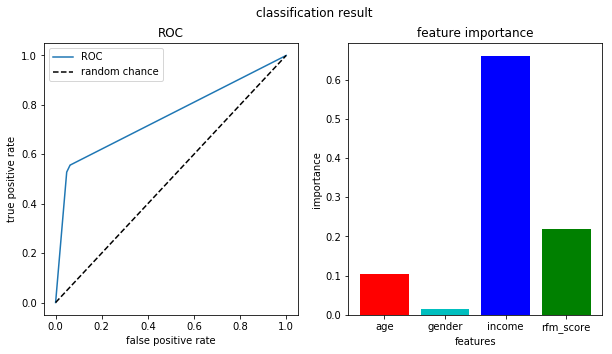

In [7]:
# 模型效果可视化
names_list = ['age', 'gender', 'income', 'rfm_score']  # 分类模型维度列表
color_list = ['r', 'c', 'b', 'g']  # 颜色列表
plt.figure(figsize=(10,5))  # 创建画布
# 子网格1：ROC曲线
plt.subplot(1, 2, 1)  # 第一个子网格
plt.plot(fpr, tpr, label='ROC')  # 画出ROC曲线
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='random chance')  # 画出随机状态下的准确率线
plt.title('ROC')  # 子网格标题
plt.xlabel('false positive rate')  # X轴标题
plt.ylabel('true positive rate')  # y轴标题
plt.legend(loc=0)
# 子网格2：指标重要性
feature_importance = model_tree.feature_importances_  # 获得指标重要性
plt.subplot(1, 2, 2)  # 第二个子网格
plt.bar(np.arange(feature_importance.shape[0]), feature_importance, tick_label=names_list, color=color_list)  # 画出条形图
plt.title('feature importance')  # 子网格标题
plt.xlabel('features')  # x轴标题
plt.ylabel('importance')  # y轴标题
plt.suptitle('classification result')  # 图形总标题

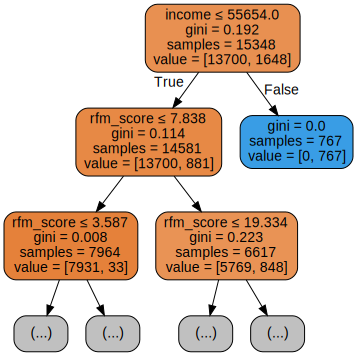

In [8]:
# 保存决策树规则图为PDF文件
dot_tree = tree.export_graphviz(model_tree,out_file=None,feature_names=names_list,max_depth=2,
                                filled=True, rounded=True,special_characters=True)# 将决策树规则生成dot对象
graph = graphviz.Source(dot_tree)
graph

In [9]:
# 模型应用
X_new = [[40, 0, 55616, 0], [17, 0, 55568, 0], [55, 1, 55932, 1]]
print ('classification prediction')
for i, data in enumerate(X_new):
    y_pre_new = model_tree.predict(np.array(data).reshape(1,-1))
    print ('classification for %d record is: %d' % (i + 1, y_pre_new))

classification prediction
classification for 1 record is: 0
classification for 2 record is: 0
classification for 3 record is: 1


# 关联分析

In [5]:
# 导入库
import sys

sys.path.append('./datacode_for_book/chapter4/')
import pandas as pd
from graphviz import Digraph
import graphviz
import apriori,apriori_original

In [6]:
# 定义数据文件
fileName = './datacode_for_book/chapter4/association.txt'

In [56]:
from importlib import reload
reload(apriori)
# 通过调用自定义的apriori做关联分析
minS = 0.1  # 定义最小支持度阀值
minC = 0.38  # 定义最小置信度阀值
dataSet = apriori.createData(fileName)  # 获取格式化的数据集
dataSet[:3]
L, suppData = apriori.apriori(dataSet, minSupport=minS)  # 计算得到满足最小支持度的规则
# rules = apriori.generateRules(fileName, L, suppData, minConf=minC)  # 计算满足最小置信度的规则
# rules

<module 'apriori' from './datacode_for_book/chapter4\\apriori.py'>

[['17092020299', '38660935334', '10939241167', '19957944783', '4002591'],
 ['38728350298', '17288980167', '14375520337', '4002591', '19957944783'],
 ['17092020299', '38660935334', '9212465263', '36989298167', '36989298167']]

['38657641492']
[]
['3382890']
[]
['38421985606']
[]
['30562668862']
[]
['24269805380']
[]
['13943415375']
[]
['666631']
[]
['38722052311']
[]
['9212465263']
[]
['36989298167']
[]
['38728350298']
[]
['17288980167']
[]
['14375520337']
[]
['4002591']
[]
['38660935334']
[]
['19957944783']
[]
['17092020299']
[]
['10939241167']
[]
[]
['38657641492']
['38657641492']
['3382890']
['3382890']
['38421985606']
['38421985606']
['30562668862']
['30562668862']
['24269805380']
['24269805380']
['13943415375']
['13943415375']
['666631']
['666631']
['38722052311']
['38722052311']
['9212465263']
['9212465263']
['36989298167']
['36989298167']
['38728350298']
['38728350298']
['17288980167']
['17288980167']
['14375520337']
['14375520337']
['4002591']
['4002591']
['38660935334']
['38660935334']
['19957944783']
['19957944783']
['17092020299']
['17092020299']
['10939241167']
['10939241167']
[]
[]
[]
['38657641492']
['38657641492']
['3382890']
['3382890']
['38421985606']
['38421985606']
['30562668862']
['305626